# 最終レポート: オンラインで無料に提供されている機械学習の教材の英語の難度
名前 Nguyen Xuan Dat


学生番号 2020150

Github Link: https://github.com/ngxuandat/Programming-I-Final

# モティベーション

近年、統計学からのアプローチをとる人工知能の研究が加速しています。実際、Google Scholarによると、2020年に最も引用された研究論文の中、最も数が多かったのは人工知能の研究でした[1]。 さらに、人工知能の最先端研究に取り組んでいる大学・大学院も、校内で行われた授業のビデオ記録、または教材・教科書を誰もアクセスできるように、オンラインに提供する傾向があります。その数多くの無料な教材の中、最も人気があるものを選んで、3000程度のよくある英単語がわかる人にとって、難度がどのぐらいかというアナリストを行います。文章全体の中、何割程度がよくある英単語のかを計算して、割合が高ければ、難度が低いという単純な尺度で進みます。

選ばれた教材が６つあります。その中の３つは教科書で、残りは授業のビデオ記録です。教科書の場合は直接にPDFファイルからテキストコーピします。授業のビデオの場合は、提供された字幕を使います。データセットの詳しくは次のようになります。
1. スタンフォード大学の2017年版の[CS231n: Convolutional Neural Networks for Visual Recognition Spring 2017](http://cs231n.stanford.edu/2017/).

グラフでの名前とデータセットのファイルの名前:*stanfordcs231n*

2. Goodfellow, I., Bengio, Y.,, Courville, A. (2016). Deep Learning. MIT Press.

open acess at: https://www.deeplearningbook.org/

グラフでの名前とデータセットのファイルの名前:*deeplearningbook*

3. fast.ai course: Practical Deep Learning for Coders

URL: https://course.fast.ai/

グラフでの名前とデータセットのファイルの名前:*fastai*

4. マサチューセッツ工科大学の2021年版の[6.S191 Introduction to Deep Learning](http://introtodeeplearning.com/)

グラフでの名前とデータセットのファイルの名前:*introtodeeplearning*

5. Sutton, R. S., Barto, A. G. (2018 ). Reinforcement Learning: An Introduction. The MIT Press.

open acess at: http://incompleteideas.net/book/the-book.html

グラフでの名前とデータセットのファイルの名前:*sutton&bart*

6. James, G., Witten, D., Hastie, T.,, Tibshirani, R. (2021). An Introduction to Statistical Learning: with Applications in R . Springer.

open acess at: https://web.stanford.edu/~hastie/ISLRv2_website.pdf

グラフでの名前とデータセットのファイルの名前:*ISLR*


その他、'3000 common English words.txt'のデータセットは[このウェブサイト](https://www.ef.com/wwen/english-resources/english-vocabulary/top-3000-words/)から参考しました。

# プログラムの説明： Loading data and data cleaning

In [1]:
import os
import string
import nltk

text_data = {}
common_words_dict = {} # this will be used to count the number of common words in the processed data
result = {}
# the insignificant string represents all English characters that will are not needed for the analysis
insignificant = string.punctuation+('1234567890•—')+('\n')
# cwd is a parameter
cwd = '/Users/datnguyen/Documents/GitHub/P1-final/Text data/'
files = os.listdir(cwd)

for filename in files:
    if filename == '.DS_Store':
        None
    elif filename == '3000 common English words.txt':
        file_dir = cwd + filename
        file = open(file_dir, 'rt')
        text = file.read()
        file.close()
        common_words = text.split("\n")
        # Generate a dictionary contains all words in common_words as key
        # with their values are all zero by default. 
        for word in common_words:
            common_words_dict[word] = 0
    else:
        file_dir = cwd + filename
        file = open(file_dir, 'rt')
        text = str(file.read()).lower()
        file.close()
        # Getting rid of insignificant characters
        text = ''.join([i for i in text if i not in insignificant])
        text = text.split(' ')
        text = list(filter(lambda a: a != '', text))
        # Using the nltk library to perform stemming on the text data for more better final result
        sno = nltk.stem.SnowballStemmer('english')
        value = [sno.stem(word) for word in text]
        # Store all processed data into the text_data dictionary
        text_data[filename[0:-4]] = value
        # We are now done with the data handling process

# プログラムの説明：Count all common words in all datasets and Plotting.

In [25]:
for text in text_data.keys():
    # The numbers of common words that appear in the text will be stored in a copy of common_words_dict
    common_words_counter = common_words_dict.copy()
    for i in text_data[text]:
        index = 5
        if i in common_words:
            common_words_counter[i] += 1
        else:
            None
    # We now calculuate the total number of common words that appear in the text.
    # The calculated number will be stored in a separate dictionary called 'result'
    result[text] = sum(common_words_counter.values())

In [26]:
result

{'stanfordcs231n': 109563,
 'deeplearningbook': 150282,
 'fastai': 95188,
 'introtodeeplearning': 59802,
 'sutton&bart': 130381,
 'ISLR': 96292}

In [27]:
for key in result.keys():
    result[key] = (result[key]/len(text_data[key]))

text = []
percentage_of_common_words = []
for each in result:
    text.append(each)
    percentage_of_common_words.append(result[each])

In [28]:
# showing the percentage of common words
result

{'stanfordcs231n': 0.6456199691223439,
 'deeplearningbook': 0.6072098134919353,
 'fastai': 0.7001794803895607,
 'introtodeeplearning': 0.6905462985415873,
 'sutton&bart': 0.6237400194229564,
 'ISLR': 0.6169044583538879}

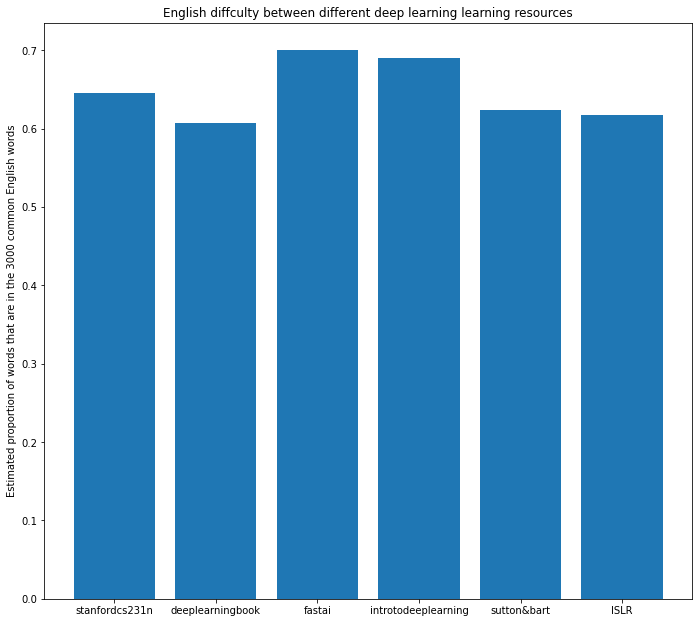

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 8))
ax = fig.add_axes([0,0,1,1])
ax.bar(text,percentage_of_common_words)
ax.set_ylabel('Estimated proportion of words that are in the 3000 common English words')
ax.set_title('English diffculty between different deep learning learning resources')
plt.show()

# 結論

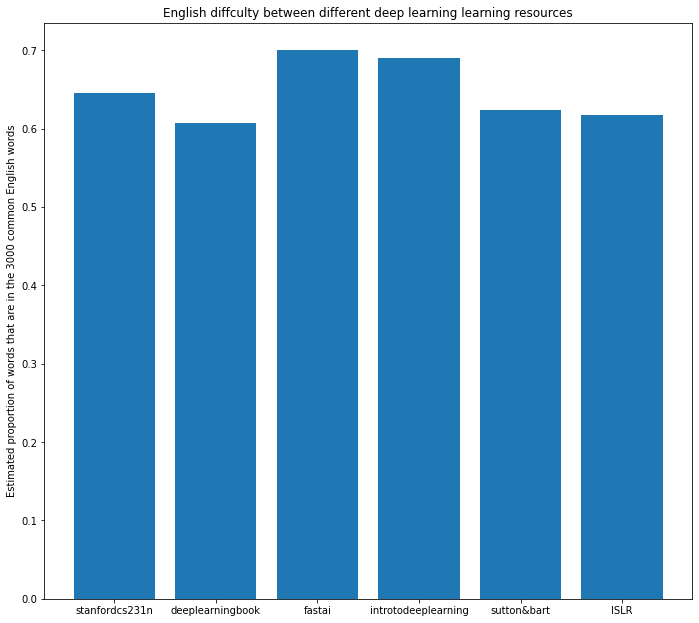

計算できたデータをグラフで可視化すると、上のような形になります。
このグラフによると、最も簡単な英語を使われたのはfastaiです。その次はintrotodeeplearningとなります。そして、一番難しいのはdeeplearningbookです。

しかし、教科書から直接にテキストをコーピしたデータセットを見れば、ノイズと異常なデータポイントが非常に多いという理由で、deeplearningbook、sutton&bart、とISLRの計算できた数値の正確性は低いと思えます。一方、残りの授業ビデオの字幕のデータセットに、日本語の「ええと」と同じな「um」などの無意味のテキストもあるので、実際に難度が計算さらた数値より低い可能性もあります。

まとめて、3000程度のよくある英語をわかれば、まだ難しいかもしれないが、オンラインで無料にアクセスできる教材を理解することは不可能ではないと結論します。今後、考察した教材のようなものの数がさらに増えるでしょう。それらの教材を活用できる人にとって、変化が加速している今後の時代においては有利になるだろうと考えます。

# 参考文献

[1] Nature Index: Google Scholar reveals its most influential papers for 2020

URL: https://www.natureindex.com/news-blog/google-scholar-reveals-most-influential-papers-research-citations-twenty-twenty 